In [ ]:
# Author: Deepak Kumar Singh
# Description: AI Dev01 - Data Classification - Predict survival based on Titanic Dataset using AutoKeras.
# Reference - https://autokeras.com/tutorial/structured_data_classification/
# Date Created: 21/01/2023
# Date Modified: 22/01/2023

In [ ]:
# Installations for Libraries which are not available in Google Colab

!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.4/162.4 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00


In [ ]:
# Upload dataset from local drive to Colab
# Other Alternative way to use dtasets with Colab - https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import tensorflow as tf
import autokeras as ak


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Sanity check that dataset is loaded to Pandas DF
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Titanic.csv']))
# Dataset is now stored in a Pandas Dataframe

data.head()
len(data)

1309

In [ ]:
data.shape


Index(['Sex', 'Age', 'Family', 'Class', 'Fare', 'Cabin', 'Port', 'Survived'], dtype='object')

In [ ]:
data.columns

Index(['Sex', 'Age', 'Family', 'Class', 'Fare', 'Cabin', 'Port', 'Survived'], dtype='object')

In [ ]:
print(data.isna().values.any())
print(data.duplicated().values.any())

True
True


In [ ]:
import seaborn as sns

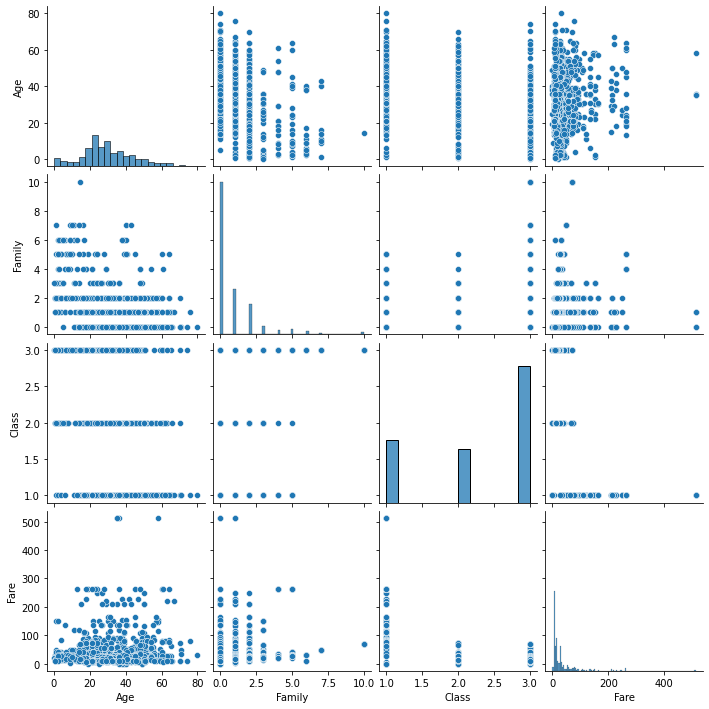

In [ ]:
sns.pairplot(data)

In [22]:
target = data['Survived']
features = data.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [23]:

X_train.head()
y_train.head()


X_test.head()
y_test.head()

271     Yes
375      No
1243     No
145     Yes
1273     No
Name: Survived, dtype: object

In [24]:
# More on https://autokeras.com/tutorial/structured_data_classification/
classifier = ak.StructuredDataClassifier(    
    max_trials = 5) #This indicates there will be 5 trials and AutoKeras will choose the best model and parameters.

# Model Training
classifier.fit(
    x = X_train,
    y = y_train,
    epochs = 10)

# Summary of Model
classifier.export_model().summary()

# Model Evaluation
score = classifier.evaluate(
    x = X_test,
    y = y_test)

# Accuracy of Model
print(score[1])


Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.7978141903877258

Best val_accuracy So Far: 0.8251366019248962
Total elapsed time: 00h 00m 28s
Epoch 1/10
33/33 [==============================] - 1s 4ms/step - loss: 0.6750 - accuracy: 0.5673
Epoch 2/10
33/33 [==============================] - 0s 4ms/step - loss: 0.5962 - accuracy: 0.7622
Epoch 3/10
33/33 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7784
Epoch 4/10
33/33 [==============================] - 0s 4ms/step - loss: 0.4881 - accuracy: 0.7880
Epoch 5/10
33/33 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.7918
Epoch 6/10
33/33 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7832
Epoch 7/10
33/33 [==============================] - 0s 4ms/step - loss: 0.4673 - accuracy: 0.8004
Epoch 8/10
33/33 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8080
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 0.

In [27]:
# Spot checks with random input
A_x = pd.DataFrame(
    data = [{
        "Sex": "female",
        "Age" : 34,         
        "Family" : 2,
        "Class" : 1,
        "Fare" : 250.0,
        "Cabin" : "B",
        "Port" : "Cherbourg"}])

A_x.head()

# Predict if A will survive
classifier.predict(A_x)[0][0]


1/1 [==============================] - 0s 7ms/step


'Yes'

In [29]:

B_x = pd.DataFrame(
    data = [{
        "Sex": "male",
        "Age" : 21,         
        "Family" : 1,
        "Class" : 2,
        "Fare" : 355.0,        
        "Cabin" : "F",
        "Port" : "Southampton"}])

B_x.head()

# Predict if B will survive
classifier.predict(B_x)[0][0]


1/1 [==============================] - 0s 7ms/step


'Yes'